# Analisi dei Bias di Embedizzazione

In [1]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

C:\Cloud\GitHub\LLMs_MasterClass\lc1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# caricamento tokenizer pre-addestrato
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# caricamento modello di linguaggio pre-addestrato
model = BertModel.from_pretrained('bert-base-uncased')

In [3]:
# definizione coppie di parole per evidenziare i bias del modello

word_pairs = [
    ('man', 'woman'),
    ('king', 'queen'),
    ('he', 'she'),
    ('father', 'mother'),
    ('boy', 'girl'),
    ('male', 'female'),
    ('brother', 'sister'),
    ('husband', 'wife'),
    
    # Coppie aggiuntive per evidenziare bias
    ('doctor', 'nurse'),
    ('engineer', 'teacher'),
    ('programmer', 'homemaker'),
    ('leader', 'assistant'),
    ('master', 'slave')
]

In [4]:
# elenco parole uniche
words = list(set([w for pair in word_pairs for w in pair]))

# calcolo vettori di embeddings per ogni parola
embeddings = []
labels = []
for word in words:
    # tokenizza la parola senza aggiungere spazi extra
    tokens = tokenizer.encode(word, add_special_tokens=False, return_tensors='pt')
    # calcola la media delle embeddings dei token
    with torch.no_grad():
        outputs = model(tokens)
        hidden_states = outputs.last_hidden_state
        word_embedding = hidden_states.mean(dim=1).squeeze()
    embeddings.append(word_embedding.numpy())
    labels.append(word)

# Riduci le dimensioni a 2D usando PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

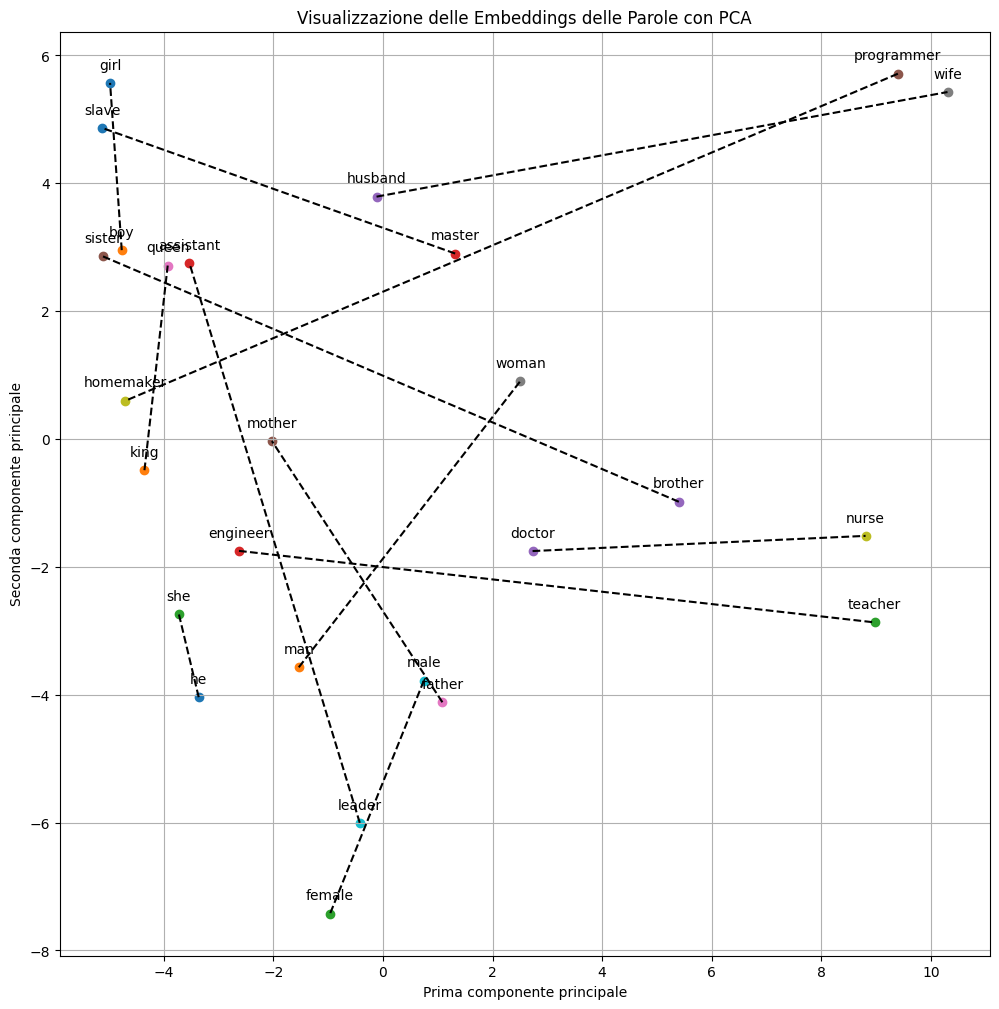

In [5]:
# Visualizza gli embeddings
plt.figure(figsize=(12, 12))
for i, label in enumerate(labels):
    x, y = embeddings_2d[i]
    plt.scatter(x, y)
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Disegna linee tra le coppie di parole
for pair in word_pairs:
    idx1 = labels.index(pair[0])
    idx2 = labels.index(pair[1])
    x_values = [embeddings_2d[idx1][0], embeddings_2d[idx2][0]]
    y_values = [embeddings_2d[idx1][1], embeddings_2d[idx2][1]]
    plt.plot(x_values, y_values, 'k--')

plt.title('Visualizzazione delle Embeddings delle Parole con PCA')
plt.xlabel('Prima componente principale')
plt.ylabel('Seconda componente principale')
plt.grid(True)
plt.show()